In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
import pymc as pm
print(f"Running on PyMC v{pm.__version__}") 
import arviz as az

Running on PyMC v5.8.0


## Build a Bayesian model using PyMC

Reference: [PyMC tutorial](https://www.pymc.io/projects/docs/en/latest/learn/core_notebooks/pymc_overview.html).

Detailed notes about **distributions**, **sampling methods** and other **PyMC functions** are available in the [API documentation](https://www.pymc.io/projects/docs/en/latest/api.html#api). 

Dustribution API:
[Link](https://www.pymc.io/projects/docs/en/latest/api/distributions.html).

## Ex1. Beta-Binomial model... 網紅

Example 1.

小白想成為網紅，想先了解一般人對網紅的看法， 他的FB
好友中19人按讚鼓勵他，23人叫他死心，剩下312人未發言。
推論一般人對網紅持正向態度的可能性?

Likelihood:

\begin{align*}
    Y \mid p &\sim \text{Binomial}(n=42,p) 
\end{align*}

Prior:
\begin{align*}       
     p &\sim \text{Uniform}(0,1) \\
     \\
\end{align*}

- $p:$ Success probability
- $n=42:$ Sample size (19+23=42)

---
Posterior:
\begin{align*}
    p \mid Y &\sim \text{Beta}(\alpha=19+1,\beta=23+1) \\
\end{align*}


Posterior mean $ = \alpha/(\alpha+\beta)=20/44=0.4545$


In [6]:
Y_data = np.array([19])

In [7]:
# Creates a new Model object (basic_model) 
basic_model = pm.Model()

# Specify model components inside the with statement:
with basic_model as m:
    # Define the prior of the parameter p.
    # pm.distribution("variable_name", distribution's parameter)
    p = pm.Uniform("p", 0 , 1) 

    # Likelihood uses observed parameter to incorporate target data
    y=pm.Binomial('y', n=42, p=p ,observed=Y_data)

- The observed values (`observed = data`) can be passed as a Python list, a tuple, a NumPy array, or a pandas DataFrame.

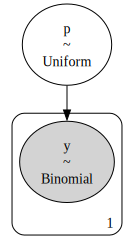

In [8]:
pm.model_to_graphviz(model=m)

In [9]:
gv = pm.model_graph.model_to_graphviz(model=m)
gv.format = 'png'
gv.render(filename='ex_1_base_m')

'ex_1_base_m.png'

In [6]:
with m:
    # Defualt draw 1000 posterior samples
    # draws=1000, tune=1000, chains=4,... 
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


In [7]:
#InferenceData object
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [8]:
#summary statistics
az.summary(idata, hdi_prob=0.95, round_to=2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.46,0.07,0.32,0.61,0.0,0.0,1965.34,2801.0,1.0


**Posterior Inference**

Show statistics of the posterior distribution based 
on the samples. :

- **mean, sd**:	Mean and standard deviation of the posterior.
- **hdi_2.5%,	hdi_97.5%**: 95% credible interval(Highest density interval)
- **mcse_mean, mcse_sd**: Monte Carlo Standard Error(MCSE) mean and standard deviation.
- **ess_bulk,	ess_tail**: Effective Sample Size(ESS) for checking the center/tail region of the posterior. 
- $\widehat{R}$ : Check for convergence (r_hat close to 1 meams good convergence)

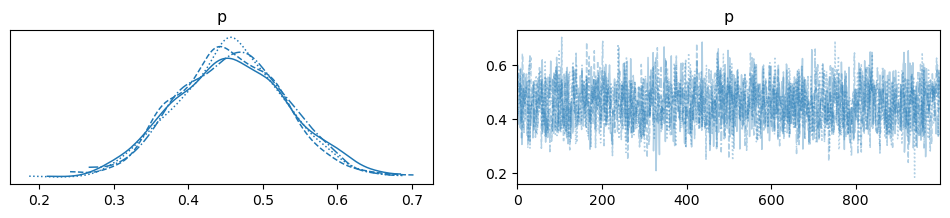

In [9]:
#Trace plot
#Left: kernel density estimation(KDE) for each chain
#Right: individual values at each sampling step
az.plot_trace(idata)
plt.show()

<Axes: title={'center': 'p'}>

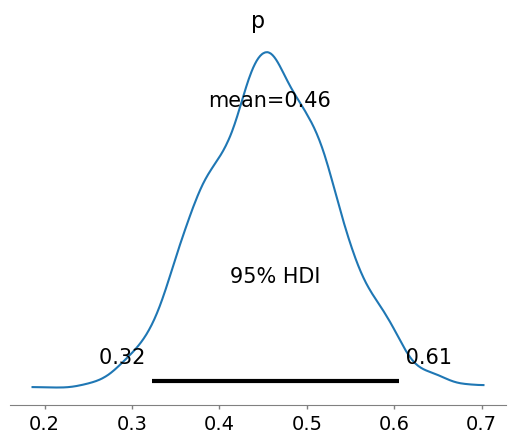

In [10]:
az.plot_posterior(idata, hdi_prob=0.95)